In [1]:
import torch
import torchvision
import torch.nn.functional as F
from torch.autograd import variable
import matplotlib.pyplot as plt


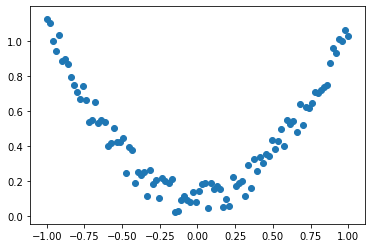

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  #一维变为二维数据
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x, y)
plt.show()

In [3]:
# device=torch.device("cpu")
# print(device)
# x=x.to(device)
# y=y.to(device)

In [4]:
class Net(torch.nn.Module):
    
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = self.hidden2(x)
        return x
    

Net(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=1, bias=True)
)


RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

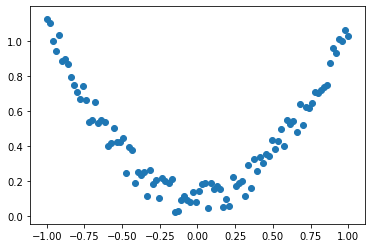

In [6]:
net = Net(1, 10, 1)
print(net)

plt.ion()   #设置为实时打印
plt.show()

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  #均方差

for i in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()   #优化   反向传播
    loss.backward()
    optimizer.step()
    
    #作图
    if i % 5 == 0:
        plt.cla()
        plt.scatter(x,y)
        plt.plot(x.numpy(), prediction.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'loss="%.4f"' % loss.item(), fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        
        
#scatter点云图
#plot直线图  